#### Library

In [113]:
import pandas as pd
import scipy
import numpy as np
from numpy import array

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from mape import mean_absolute_percentage_error

from IPython.display import clear_output
from pandas import ExcelWriter

import keras
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import SimpleRNN
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.models import model_from_json
from keras.layers import Dropout

from data_reshape import univariate_reshape

#### Dataset

In [114]:
path = r'power_dataset.xlsx'
data = pd.read_excel (path)
a = 20
b = a-1
target = data.power.iloc[-a*24*7:-b*24*7]
target = target.reset_index(drop=True)
dataset = data.power.iloc[:-a*24*7]
dataset = pd.DataFrame(dataset)

In [115]:
# Normalize Dataset )
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

#### Load LSTM Model

In [116]:
json_file = open('LSTM model.json', 'r')
# json_file = open('LSTM5.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model_lstm = model_from_json(loaded_model_json)

# load weights into new model
model_lstm.load_weights("LSTM model.h5")

#### Load RNN Model

In [117]:
# load RNN MODEL
json_file = open('RNN model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model_rnn = model_from_json(loaded_model_json)

# load weights into new model
model_rnn.load_weights("RNN model.h5")

#### Load ANN Model 

In [118]:
# load ANN MODEL
json_file = open('ANN model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model_ann = model_from_json(loaded_model_json)

# load weights into new model
model_ann.load_weights("ANN model.h5")

#### LSTM Prediction

In [119]:
#LSTM 
in_steps_lstm = 1
in_features_lstm = 336
out_steps_lstm = 168
train_x,train_y,test_sample = univariate_reshape(dataset,in_steps_lstm,in_features_lstm,out_steps_lstm,target)

predict = model_lstm.predict(test_sample)
predict_lstm = scaler.inverse_transform(predict)

Parameter Data:

Panjang Data : 19320
In Feature : 336
In step : 1
Out step : 168
Sampel : 18817

Input Data Shape :
(samples,timesteps,features)
Shape train_x :
(18817, 1, 336)

Output Data Shape :
(samples,timesteps)
Shape train_y :
(18817, 168)

Sampel Data untuk input prediksi
Shape test_sample :
(1, 1, 336)

Target Prediksi Data
Shape target :
(168,)



In [120]:
predict = model_lstm.predict(test_sample)
predict_lstm = scaler.inverse_transform(predict)

#### RNN Prediction

In [121]:
#RNN
in_steps_rnn = 1
in_features_rnn = 336
out_steps_rnn = 168
train_x,train_y,test_sample = univariate_reshape(dataset,in_steps_rnn,in_features_rnn,out_steps_rnn,target)

predict = model_rnn.predict(test_sample)
predict_rnn = scaler.inverse_transform(predict)

Parameter Data:

Panjang Data : 19320
In Feature : 336
In step : 1
Out step : 168
Sampel : 18817

Input Data Shape :
(samples,timesteps,features)
Shape train_x :
(18817, 1, 336)

Output Data Shape :
(samples,timesteps)
Shape train_y :
(18817, 168)

Sampel Data untuk input prediksi
Shape test_sample :
(1, 1, 336)

Target Prediksi Data
Shape target :
(168,)



#### ANN Prediction

In [122]:
in_steps_ann = 1
in_features_ann = 168
out_steps_ann = 168
train_x,train_y,test_sample = univariate_reshape(dataset,in_steps_ann,in_features_ann,out_steps_ann,target)
test_sample = test_sample.reshape(test_sample.shape[0],test_sample.shape[2])

predict = model_ann.predict(test_sample)
predict_ann = scaler.inverse_transform(predict)

Parameter Data:

Panjang Data : 19320
In Feature : 168
In step : 1
Out step : 168
Sampel : 18985

Input Data Shape :
(samples,timesteps,features)
Shape train_x :
(18985, 1, 168)

Output Data Shape :
(samples,timesteps)
Shape train_y :
(18985, 168)

Sampel Data untuk input prediksi
Shape test_sample :
(1, 1, 168)

Target Prediksi Data
Shape target :
(168,)



#### ARIMA Prediction

In [123]:
# #ARIMA

# path = r'forecast_arima.xlsx'
# hasil_arima = pd.read_excel (path)
# hasil_arima.head()

### Plot Grafik Prediksi

Text(0.5, 1, 'Prediction Plot')

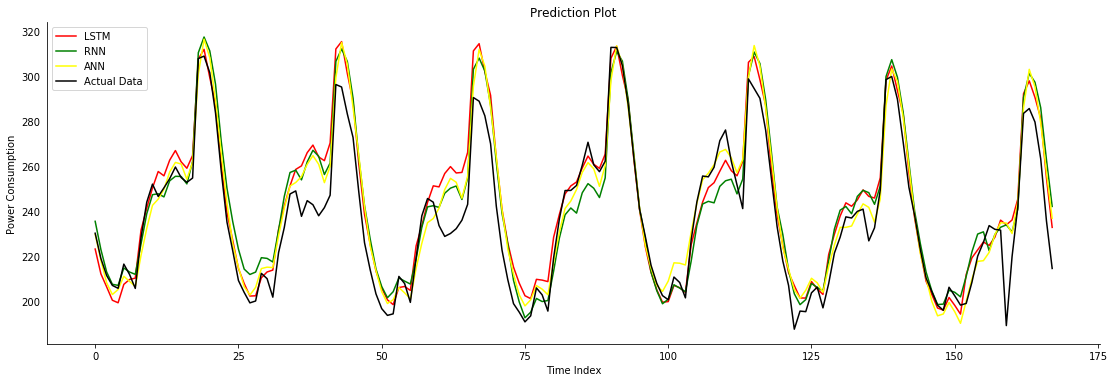

In [124]:
a = 0
b = 168
c = b-a
ind = []
for i in range(c):
    ind.append(i)
plt.figure(figsize=(16,5))
plt.plot(predict_lstm[0][a:b],'red', label = "LSTM")
plt.plot(predict_rnn[0][a:b],'green', label = "RNN")
plt.plot(predict_ann[0][a:b],'yellow', label = "ANN")
# plt.plot(hasil_arima[a:b].reset_index(drop=True),'blue', label = "ARIMA")
plt.plot(target[a:b].reset_index(drop=True),'black', label = "Actual Data")
# plt.scatter(ind,target[a:b].reset_index(drop=True))
plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.xlabel('Time Index')
plt.ylabel('Power Consumption')
plt.legend(loc='upper left')
plt.title('Prediction Plot')

In [125]:
RMSE_LSTM = np.sqrt(mean_squared_error(target,predict_lstm[0]))
MAPE_LSTM = mean_absolute_percentage_error(target,predict_lstm[0])

RMSE_RNN = np.sqrt(mean_squared_error(target,predict_rnn[0]))
MAPE_RNN = mean_absolute_percentage_error(target,predict_rnn[0])

RMSE_ANN = np.sqrt(mean_squared_error(target,predict_ann[0]))
MAPE_ANN = mean_absolute_percentage_error(target,predict_ann[0])

In [126]:
print("Nilai MAPE LSTM adalah : {}".format(MAPE_LSTM))
print("Nilai RMSE LSTM adalah : {}".format(RMSE_LSTM))

print("Nilai MAPE RNN adalah : {}".format(MAPE_RNN))
print("Nilai RMSE RNN adalah : {}".format(RMSE_RNN))

print("Nilai MAPE ANN adalah : {}".format(MAPE_ANN))
print("Nilai RMSE ANN adalah : {}".format(RMSE_ANN))

Nilai MAPE LSTM adalah : 3.6978146318599325
Nilai RMSE LSTM adalah : 11.443370839883091
Nilai MAPE RNN adalah : 3.8657897784093853
Nilai RMSE RNN adalah : 11.585337477091967
Nilai MAPE ANN adalah : 3.303883513836952
Nilai RMSE ANN adalah : 10.328358608633982


In [127]:
dfhasil = pd.DataFrame(columns = ['lstm','rnn','ann','arima','target']) 
for i in range(len(hasil_arima)):
    dfhasil = dfhasil.append({'lstm':predict_lstm[0][i],'rnn':predict_rnn[0][i],'ann':predict_ann[0][i],'arima':hasil_arima.forecast.iloc[i],'target':target[i]},ignore_index = True)

#### Pengujian Signifikansi 

1. Pengujian Normalitas

In [128]:
# normality test
from scipy.stats import normaltest
stat, p = normaltest(dfhasil.lstm-dfhasil.ann)
print('Statistics=%.3f, p=%.5f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('LSTM ANN Sample looks Gaussian (fail to reject H0)')
else:
    print('LSTM ANN Sample does not look Gaussian (reject H0)')

Statistics=1.084, p=0.58162
LSTM ANN Sample looks Gaussian (fail to reject H0)


In [129]:
# normality test
from scipy.stats import normaltest
stat, p = normaltest(dfhasil.lstm-dfhasil.rnn)
print('Statistics=%.3f, p=%.5f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('LSTM RNN Sample looks Gaussian (fail to reject H0)')
else:
    print('LSTM RNN Sample does not look Gaussian (reject H0)')

Statistics=9.990, p=0.00677
LSTM RNN Sample does not look Gaussian (reject H0)


In [130]:
# normality test
from scipy.stats import normaltest
stat, p = normaltest(dfhasil.lstm-dfhasil.arima)
print('Statistics=%.3f, p=%.5f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('LSTM ARIMA Sample looks Gaussian (fail to reject H0)')
else:
    print('LSTM ARIMA Sample does not look Gaussian (reject H0)')

Statistics=8.722, p=0.01277
LSTM ARIMA Sample does not look Gaussian (reject H0)


2. Pengujian Signifikansi

In [131]:
#LSTM ANN
from scipy.stats import wilcoxon
stat, p = wilcoxon(dfhasil.lstm, dfhasil.ann)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample is not significantly different (accept H0)')
else:
    print('Sample is significantly different (reject H0)')

Statistics=4805.000, p=0.000
Sample is significantly different (reject H0)


In [132]:
#LSTM RNN
[stat,pval] = scipy.stats.ttest_rel(dfhasil.lstm,dfhasil.rnn)
alpha = 0.05;
print('T stat = {}'.format(stat))
print('P Value = {}'.format(pval))
if pval < alpha:
    print('Sample is significantly different (reject H0)')
else:
    print('Sample is not significantly different (accept H0)')

T stat = 1.5892013636431763
P Value = 0.11390632406870799
Sample is not significantly different (accept H0)


In [133]:
#LSTM ARIMA
[stat,pval] = scipy.stats.ttest_rel(dfhasil.lstm,dfhasil.arima)
alpha = 0.05;
print('T stat = {}'.format(stat))
print('P Value = {}'.format(pval))
if pval < alpha:
    print('Sample is significantly different (reject H0)')
else:
    print('Sample is not significantly different (accept H0)')

T stat = -34.764669033184894
P Value = 2.243266013359671e-78
Sample is significantly different (reject H0)
